# <b>CAT VS DOG Classification

In this project we are going to classify the image of dog and cats based on the CNN network and some model such as a used define CNN network , ResNet50 and InceptionV3

In [ ]:
#importing dependencies
import tensorflow as tf

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Creating the CNN model
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    
    Dense(256, activation="relu"),
    Dense(128, activation="tanh"),
    Dense(26456, activation="relu"),
    Dense(32, activation="tanh"),
    Dropout(0.5),
    
    Dense(1, activation="sigmoid")  # Binary classification (1 neuron for binary output)
])

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Loading the dataset
training_set = train_datagen.flow_from_directory('C:/Users/DEVSH\Project/cat vs dog/test',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')  # binary classification

testing_set = test_datagen.flow_from_directory('C:/Users/DEVSH/Project/cat vs dog/test',
                                               target_size=(64, 64),
                                               batch_size=32,
                                               class_mode='binary')



# Save the trained model
model.save('c2_updated.h5')


Found 5000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [26]:
# Fitting the model
a=model.fit(training_set, epochs=50, validation_data=testing_set)

Epoch 1/50
157/157 [==============================] - 21s 129ms/step - loss: 0.6786 - accuracy: 0.5594 - val_loss: 0.6842 - val_accuracy: 0.5526
Epoch 2/50
157/157 [==============================] - 18s 113ms/step - loss: 0.6347 - accuracy: 0.6426 - val_loss: 0.6597 - val_accuracy: 0.6330
Epoch 3/50
157/157 [==============================] - 17s 106ms/step - loss: 0.5870 - accuracy: 0.6932 - val_loss: 0.5319 - val_accuracy: 0.7414
Epoch 4/50
157/157 [==============================] - 17s 109ms/step - loss: 0.5573 - accuracy: 0.7216 - val_loss: 0.5164 - val_accuracy: 0.7474
Epoch 5/50
157/157 [==============================] - 16s 103ms/step - loss: 0.5358 - accuracy: 0.7330 - val_loss: 0.4843 - val_accuracy: 0.7706
Epoch 6/50
157/157 [==============================] - 21s 132ms/step - loss: 0.5197 - accuracy: 0.7440 - val_loss: 0.4669 - val_accuracy: 0.7816
Epoch 7/50
157/157 [==============================] - 16s 103ms/step - loss: 0.4979 - accuracy: 0.7598 - val_loss: 0.4404 - val_ac

<Axes: >

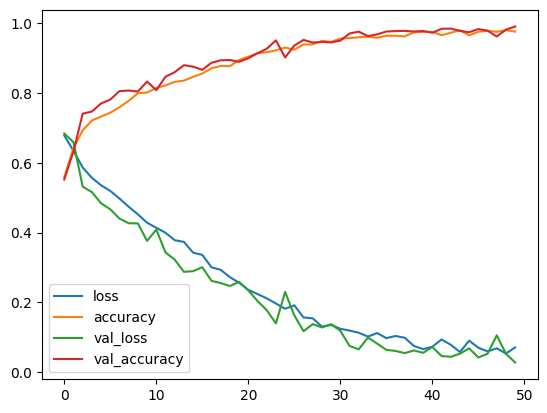

In [27]:
#when using tanh and relu with epoch=50
pd.DataFrame(a.history).plot()

<Axes: >

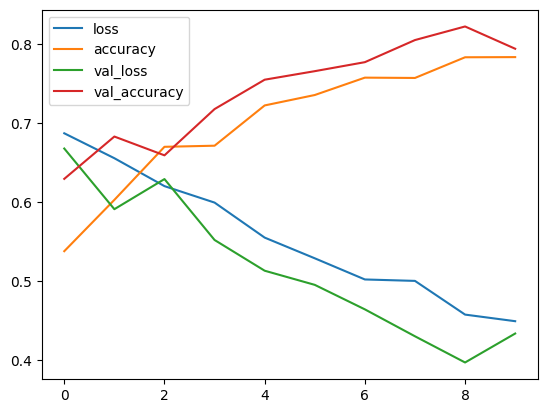

In [23]:
#graph when activation functon is relu
pd.DataFrame(a.history).plot()

<Axes: >

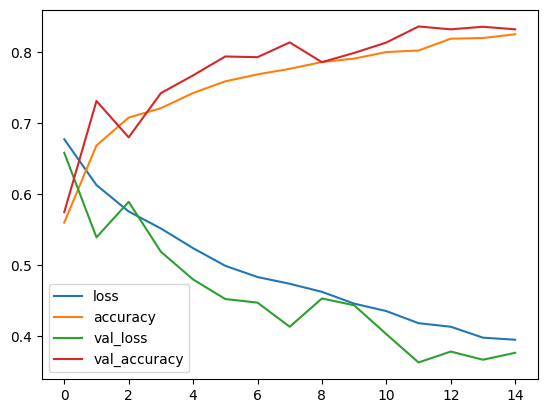

In [30]:
#graph when activation functon is tanh
import pandas as pd
pd.DataFrame(a.history).plot()

<Axes: >

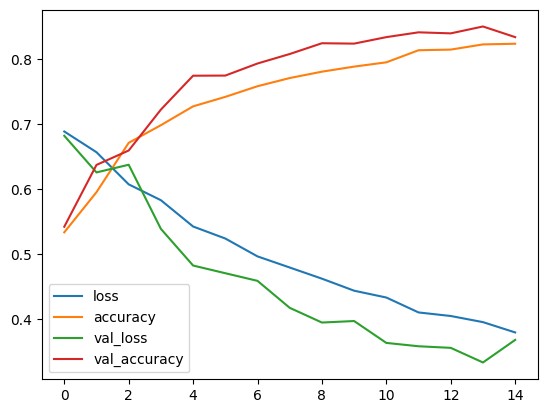

In [32]:
#graph when activation functon are tanh and relu
pd.DataFrame(a.history).plot()

<Axes: >

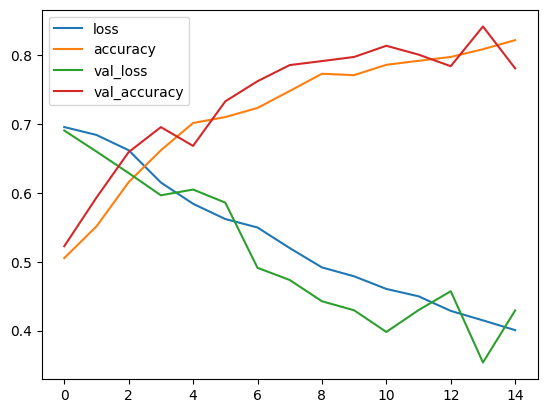

In [9]:
pd.DataFrame(a.history).plot()

# ResNet50 model

In [12]:
# Define input shape based on ResNet requirements
input_shape = (224, 224, 3)

# Load pre-trained ResNet50 model with weights trained on ImageNet
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape
)

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model
model3 = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification: cat or dog
])

# Compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
c=model3.fit(
    training_set,
    epochs=50,
    validation_data=testing_set
)

# Save the trained model
model3.save('cat_dog_resnet_model.h5')


Epoch 1/50
157/157 [==============================] - 23s 127ms/step - loss: 0.6986 - accuracy: 0.5104 - val_loss: 0.6926 - val_accuracy: 0.5058
Epoch 2/50
157/157 [==============================] - 18s 114ms/step - loss: 0.6897 - accuracy: 0.5334 - val_loss: 0.6867 - val_accuracy: 0.5678
Epoch 3/50
157/157 [==============================] - 18s 112ms/step - loss: 0.6846 - accuracy: 0.5538 - val_loss: 0.6720 - val_accuracy: 0.6044
Epoch 4/50
157/157 [==============================] - 17s 111ms/step - loss: 0.6835 - accuracy: 0.5600 - val_loss: 0.6577 - val_accuracy: 0.6100
Epoch 5/50
157/157 [==============================] - 17s 111ms/step - loss: 0.6677 - accuracy: 0.5866 - val_loss: 0.6702 - val_accuracy: 0.5702
Epoch 6/50
157/157 [==============================] - 19s 119ms/step - loss: 0.6647 - accuracy: 0.5990 - val_loss: 0.6425 - val_accuracy: 0.6200
Epoch 7/50
157/157 [==============================] - 18s 112ms/step - loss: 0.6631 - accuracy: 0.6038 - val_loss: 0.6431 - val_ac

<Axes: >

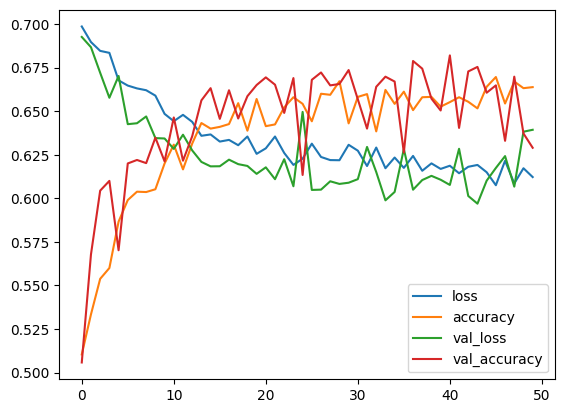

In [13]:
import pandas as pd
pd.DataFrame(c.history).plot()
#when epoch is 50

<Axes: >

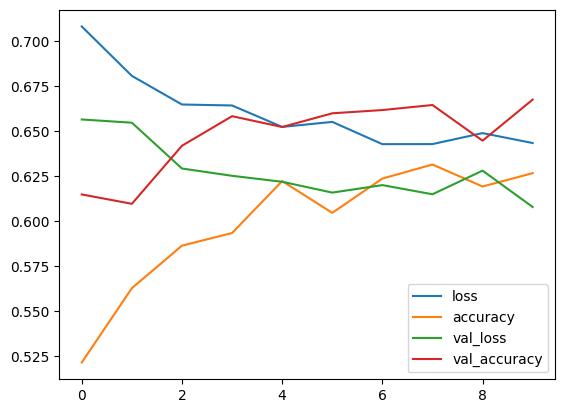

In [12]:
import pandas as pd
pd.DataFrame(c.history).plot()

# InceptionV3 

In [13]:
from tensorflow.keras.applications import InceptionV3

# Define the input shape for your images
input_shape = (299, 299, 3)  # InceptionV3 requires input shape to be (299, 299, 3)

# Load pre-trained InceptionV3 model with weights trained on ImageNet
base_model1 = InceptionV3(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape
)

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model
model4 = tf.keras.models.Sequential([
    base_model1,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

# Compile the model
optimizer = Adam()
model4.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model4.summary()


# Train the model
d=model4.fit(
    training_set,
    epochs=10,
    validation_data=testing_set
)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_7 (Dense)             (None, 128)               262272    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 22,065,185
Trainable params: 22,030,753
Non-trainable params: 34,432
_____________________________________

: 

<Axes: >

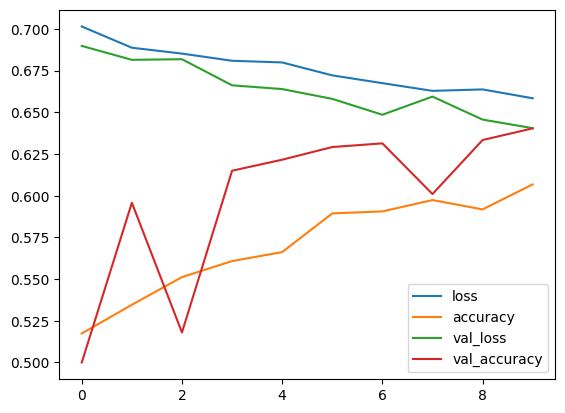

In [43]:
pd.DataFrame(d.history).plot()

# Making GUI using ChatGPT

In [28]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('c2_updated.h5')  # Replace with the actual path to your model file

# Function to make predictions
def predict_image(file_path):
    image = Image.open(file_path).resize((64, 64))
    image_array = np.array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    prediction = model.predict(image_array)
    class_idx = np.argmax(prediction)
    
    class_labels = {0: 'Cat', 1: 'Dog'} 
    result_label.config(text=f'Prediction: {class_labels[class_idx]}')

# Function to open file dialog and get file path
def browse_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        img = Image.open(file_path)
        img = img.resize((250, 250), Image.LANCZOS)
        img = ImageTk.PhotoImage(img)
        panel = tk.Label(window, image=img)
        panel.image = img
        panel.grid(row=2, column=0, columnspan=2)
        predict_image(file_path)

# GUI setup
window = tk.Tk()
window.title("Cat vs Dog Classifier")

browse_button = tk.Button(window, text="Browse Image", command=browse_image)
browse_button.grid(row=0, column=0, pady=10)

result_label = tk.Label(window, text="Prediction: ")
result_label.grid(row=1, column=0, pady=10)

window.mainloop()


1/1 [==============================] - 0s 89ms/step


In this way we can take the image from the user and after that we can see how he classification is being done by the algorithm 

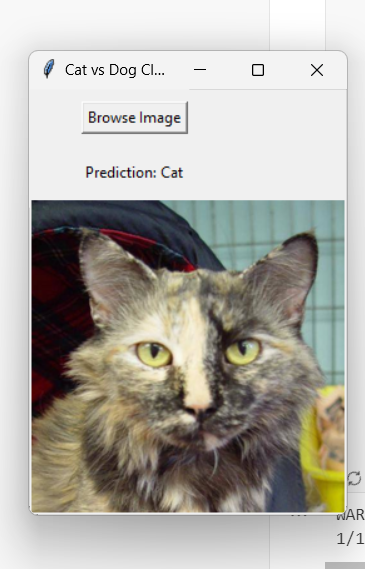